In [ ]:
# 캐라스의 fit() 훈련 메서드는 History 클래스 객체를 반환한다
# 이는 훈련 과정에서 계산한 지표인 손실과 정확도 값을 저장하고 있다. 
# 이 값으로 그래프를 만들수 있다 

In [14]:
# 데이터 로드
from tensorflow import keras
from sklearn.model_selection import train_test_split



# 훈련 데이터 테스트 데이터 분리해서 가져온다
(train_input, train_target), (test_input, test_target) = (
    keras.datasets.fashion_mnist.load_data()
)

train_scaled = train_input / 255.0

# 데이터셋 검증 세트 분리

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)


In [30]:
# 모델 생성 함수 작성 

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation="relu"))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model
    

In [31]:
model = model_fn()
model.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose 옵션 사용 



In [33]:
print(history.history)

{'accuracy': [0.812125027179718, 0.8575208187103271, 0.871708333492279, 0.879520833492279, 0.885854184627533], 'loss': [0.53482586145401, 0.3963780105113983, 0.3572731018066406, 0.33371102809906006, 0.3182665705680847]}


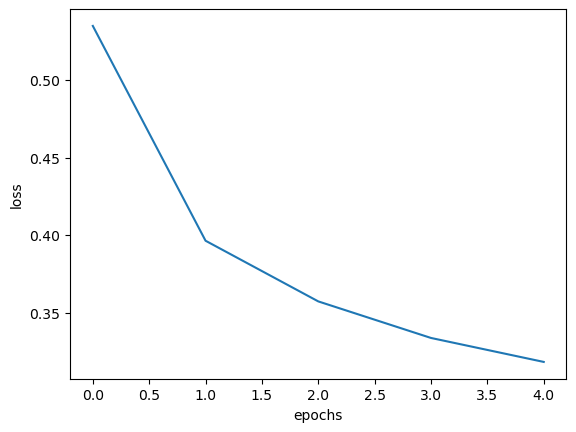

In [34]:

# 상실도 그래프 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

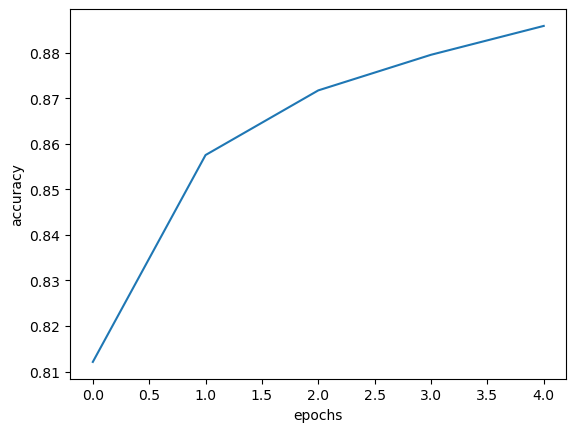

In [35]:
# 정확도 그래프
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


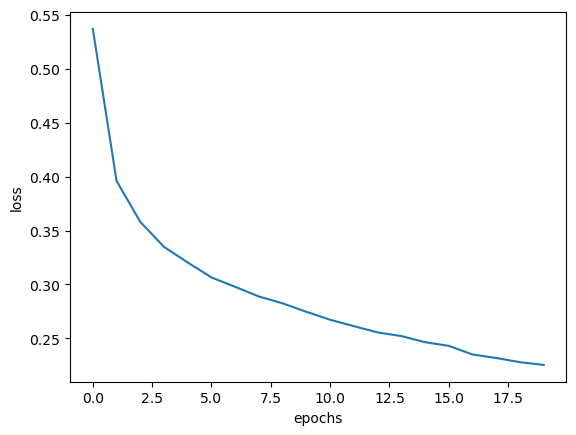

In [36]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_scaled,train_target,epochs=20,verbose=0)

plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [37]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target))

print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


C:\Users\3호실-09\AppData\Local\Temp\ipykernel_13396\1193878013.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("tran",'validation')


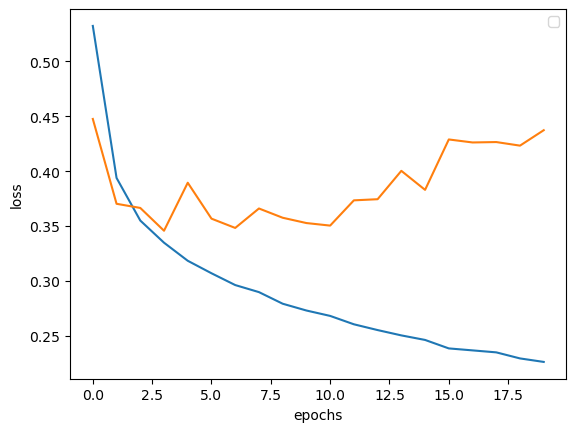

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend("tran",'validation')
plt.show()

# 초기 검증 손실이 감소하다가 5~7 번째 에포크만에 다시 상승한다 
# 훈련 손실은 꾸준히 감소하기 떄문에 전형적인 과대적합이다. 
# 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들뿐만 아니라 서로에 대한 정확도도 증가 
# 옵티마이저 파라미터는 과대적합을 완화 시킬수 있다. 

C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\3호실-09\AppData\Local\Temp\ipykernel_13396\2189165288.py:17: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("tran", "validation")


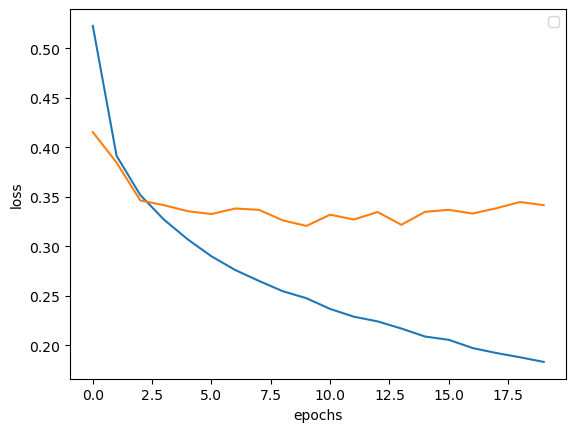

In [39]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_scaled, val_target),
)


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend("tran", "validation")
plt.show()

## 드롭아웃 ##


- 훈련 과정에서 flatten층 있는 일부 뉴런을 랜덤학 꺼서, 즉 뉴런 출력을 0으로 만들어서 과대적합을 막는다.(교재 401p 그림)
- 어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없다.
- 다른 샘플을 처리할 때는 첫 번째 뉴런이 드롭아웃된다.
- 이와 같은 방식으로 얼마나 많은 뉴런을 드롭할지는 정해야 한다.
- 케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다.

In [40]:
# 모델 fn 함수에 드랍아웃 ( 드랍률 30 퍼센트 )
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

## 결과를 보면 은익층 뒤에 추가된 드롭아웃층은 훈련되는 모델 파라미터가 없다.
# 입력과 출력의 크기도 같다.
# 이와 같이 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 실행하지 않는다.
# 그렇다고 모델을 훈련한 다음 층을 다시 빼야 하는 것이 아니다.
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.
# 따라서 바로 검증 점수를 계산하게 된다.


C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\3호실-09\AppData\Local\Temp\ipykernel_13396\3248878280.py:19: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("tran", "validation")


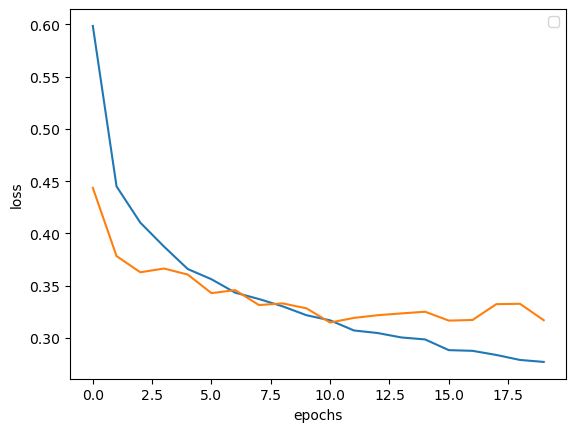

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_scaled, val_target),
)


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend("tran", "validation")
plt.show()

# 에포크가 8~9 정도에 과적합이 가장 적다 

In [50]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=8,
    verbose=0,
    validation_data=(val_scaled, val_target),
)


In [51]:
# 훈련된 모델은 별도의 파일로 저장해서 만든다 
# 이를 위해 save_weights() 메서드 사용 
# 저장한 포멧은 .h5로 HTF5다 

model.save_weights("model-weights.weights.h5")

In [52]:
# 모델 구조와 파라미터를 함꼐 저장하기 위해 save() 메서드 사용 
model.save('model-final.h5')

In [57]:
# 데이터 예측 검증
# 캐라스에서 예측 수행은 predict()메서드 사용한다. 
# 여기서는 MNIST 데이터셋이 10개의 묶음이기 떄문에 10개의 클래스에 대한 확률을 반환한다.
# 10개의 확률 중에서 가장 큰 값의 인덱스를 골라(argmax()) 타겟 레이블과 비교하여 정확도를 계산한다. 

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=1) # axis = 1 : 검증세트는 2차원의 배열이기 떄문에 마지막 차원이 1이다 



# 즉 각 컬럼의 최댓값의 인덱스를 선택하고 axis 0 이면 각 컬럼의 로우중 최댓값을 선택한다. 

# 두 배열에서 각 위치의 값에 같으면 (모델 파일과 검증 세트의 위치 값이 같으면 ) 1이 되고 다르면 0이 된다
# 이를 평균하면 정확도가 계산된다

print(np.mean(val_labels == val_target))



375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.874


In [58]:
# 저장된 모델로 검증 세트를 평가한다. 

model = keras.models.load_model('model-final.h5')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.3459


[0.34147289395332336, 0.8740000128746033]

In [61]:
# 지금까지 
# 1. 20번 에포크 돌림. 
# 2. 에포크동안 검증 점수 와 훈련 점수를 비교하여 최적점 검색 
# 3. 최적 에포크수를 다시 훈련 
#  모델을 두번 훈련하지 ㅇ낳고 한번에 끝낼 방법은 콜백이다 

# 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체다
# keras.callbacks 패키지 아래에 있는 클래스다.
# fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.
# 여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 지정한다.
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.
# 저장될 파일 이름을 best-model.h5로 지정한다.


model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.keras", save_best_only=True)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb]
)

# 콜백을 사용하면 최적점을 찾긴하지만 여전히 에포크는 지정된 20번을 사용한다 

C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
#베스트 모델로 예측 모델


model = keras.models.load_model("best-model.keras")
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8818 - loss: 0.3256


[0.328802227973938, 0.8797500133514404]

In [65]:
# 검증 점수가 상승할떄 훈련을 계속할 필요가 없다. 
# 훈련을 중지할수 있는 방법이 조기종료라고 한다.

# 케라스에서는 조기 종류를 위한 EarlyStopping 콜백을 제공한다.
# 이 콜백의 patience 매개변수는 검증 점수가 일정 횟수를 진행해도 향상되지 않으면 멈추는 에포크 횟수를 지정한다.
# patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 중지한다.
# restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
# 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.


model = model_fn(keras.layers.Dropout(0.3))
model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)


C:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# 몇번쨰 에포크에서 중지됐는지 확인 
print(early_stopping_cb.stopped_epoch)

8


C:\Users\3호실-09\AppData\Local\Temp\ipykernel_13396\2291358877.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("tran", "validation")


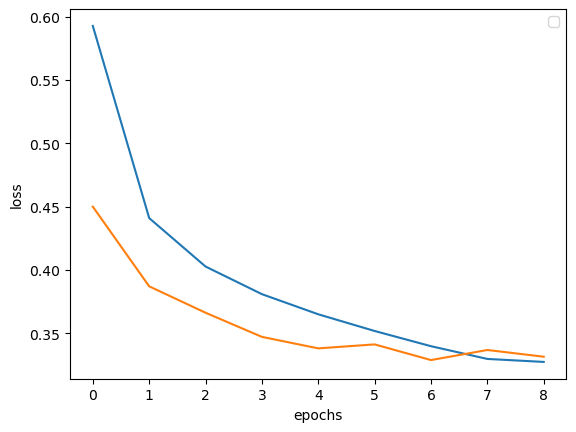

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend("tran", "validation")
plt.show()
